In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [2]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### ========== TODO : START ========== ###
        ### part d: implement OneLayerNetwork with torch.nn.Linear
        self.layer1 = torch.nn.Linear(784, 3)
        
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part d: implement the foward function
        outputs = self.layer1(x)

        ### ========== TODO : END ========== ###
        return outputs

In [4]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### ========== TODO : START ========== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear
        self.layer1 = torch.nn.Linear(784, 400)
        self.layer2 = torch.nn.Linear(400, 3)
        
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part g: implement the foward function
        outputs = self.layer1(x)
        outputs = torch.sigmoid(outputs)
        outputs = self.layer2(outputs)


        ### ========== TODO : END ========== ###
        return outputs

In [5]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [6]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [7]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()
        
    return total_loss / len(dataloader)

In [8]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()
        
    return total_acc / len(dataloader.dataset)

In [9]:
def train(model, criterion, optimizer, train_loader, valid_loader):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, 31):
        model.train()
        
        for batch_X, batch_y in train_loader:
            ### ========== TODO : START ========== ###
            ### part f: implement the training process
            
            # forward pass
            predictions = model(batch_X)
            loss = criterion(predictions, batch_y)

            # backward pass
            optimizer.zero_grad()
            loss.backward()

            # optimizer step
            optimizer.step()

            ### ========== TODO : END ========== ###
            
        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

Data preparation...
Start training OneLayerNetwork...
| epoch  1 | train loss 0.694679 | train acc 0.893333 | valid loss 0.709019 | valid acc 0.846667 |
| epoch  2 | train loss 0.477695 | train acc 0.950000 | valid loss 0.498550 | valid acc 0.900000 |
| epoch  3 | train loss 0.360091 | train acc 0.960000 | valid loss 0.383579 | valid acc 0.926667 |
| epoch  4 | train loss 0.290298 | train acc 0.976667 | valid loss 0.315433 | valid acc 0.940000 |
| epoch  5 | train loss 0.244471 | train acc 0.976667 | valid loss 0.270930 | valid acc 0.946667 |
| epoch  6 | train loss 0.211944 | train acc 0.980000 | valid loss 0.239561 | valid acc 0.946667 |
| epoch  7 | train loss 0.187497 | train acc 0.980000 | valid loss 0.216186 | valid acc 0.953333 |
| epoch  8 | train loss 0.168323 | train acc 0.980000 | valid loss 0.198035 | valid acc 0.960000 |
| epoch  9 | train loss 0.152790 | train acc 0.983333 | valid loss 0.183491 | valid acc 0.960000 |
| epoch 10 | train loss 0.139885 | train acc 0.986667 |

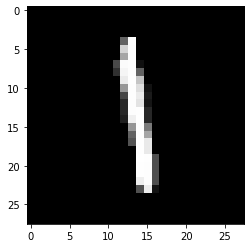

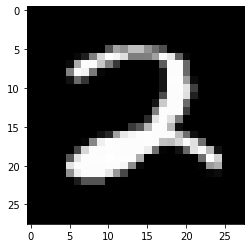

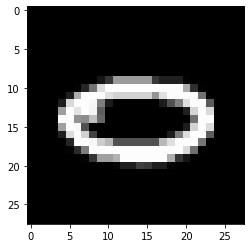

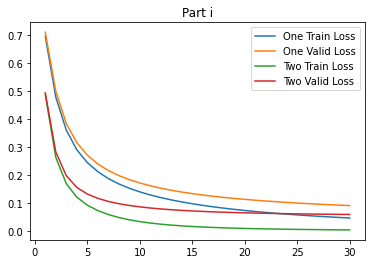

Test Accuracy for Model 1: 96.67
Test Accuracy for Model 2: 96.67


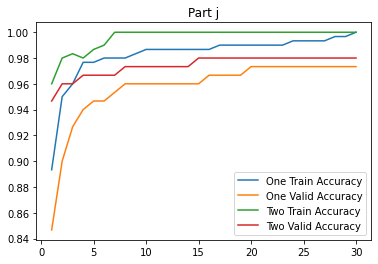

In [10]:
######################################################################
# main
######################################################################

def main():

    # fix random seed
    np.random.seed(0)
    torch.manual_seed(0)

    # load data with correct file path

    ### ========== TODO : START ========== ###
    data_directory_path =  "/content/drive/My Drive/CSM146/HW3"
    ### ========== TODO : END ========== ###

    # X.shape = (n_examples, n_features)
    # y.shape = (n_examples, )
    X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
    X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
    X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

    ### ========== TODO : START ========== ###
    ### part a: print out three training images with different labels
    plot_img(X_train[29])
    plot_img(X_train[203])
    plot_img(X_train[234])
    
    ### ========== TODO : END ========== ###

    print("Data preparation...")

    ### ========== TODO : START ========== ###
    ### part b: convert numpy arrays to tensors
    X_train = torch.from_numpy(X_train)
    y_train = torch.from_numpy(y_train)
    X_valid = torch.from_numpy(X_valid)
    y_valid = torch.from_numpy(y_valid)
    X_test = torch.from_numpy(X_test)
    y_test = torch.from_numpy(y_test)

    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part c: prepare dataloaders for training, validation, and testing
    ###         we expect to get a batch of pairs (x_n, y_n) from the dataloader
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(dataset=train_dataset, batch_size=10)
    valid_dataset = TensorDataset(X_valid, y_valid)
    valid_loader = DataLoader(dataset=valid_dataset, batch_size=10)
    test_dataset = TensorDataset(X_test, y_test)
    test_loader = DataLoader(dataset=test_dataset, batch_size=10)
    
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part e: prepare OneLayerNetwork, criterion, and optimizer
    model_one = OneLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_one.parameters(), lr=0.0005)
    
    ### ========== TODO : END ========== ###

    print("Start training OneLayerNetwork...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    ### ========== TODO : START ========== ###
    ### part h: prepare TwoLayerNetwork, criterion, and optimizer
    model_two = TwoLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_two.parameters(), lr=0.0005)
    
    ### ========== TODO : END ========== ###

    print("Start training TwoLayerNetwork...")
    results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
    two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

    ### ========== TODO : START ========== ###
    ### part i: generate a plot to comare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss

    epochs = np.arange(1, 31)

    
    plt.show()
    plt.title("Part i")
    plt.plot(epochs, one_train_loss, label="One Train Loss")
    plt.plot(epochs, one_valid_loss, label="One Valid Loss")
    plt.plot(epochs, two_train_loss, label="Two Train Loss")
    plt.plot(epochs, two_valid_loss, label="Two Valid Loss")
    plt.legend()
    plt.show()
    
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part j: generate a plot to comare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc

    plt.title("Part j")
    plt.plot(epochs, one_train_acc, label="One Train Accuracy")
    plt.plot(epochs, one_valid_acc, label="One Valid Accuracy")
    plt.plot(epochs, two_train_acc, label="Two Train Accuracy")
    plt.plot(epochs, two_valid_acc, label="Two Valid Accuracy")
    plt.legend()
    
    ### ========== TODO : END ========== ##

    ### ========== TODO : START ========== ###
    ### part k: calculate the test accuracy

    num_correct_one = 0
    num_samples_one = 0
    num_correct_two = 0
    num_samples_two = 0
    model_one.eval()
    model_two.eval()

    with torch.no_grad():
      for x, y in test_loader:
        scores_one = model_one(x)
        scores_two = model_two(x)
        _, predictions_one = scores_one.max(1)
        _, predictions_two = scores_two.max(1)

        num_correct_one += (predictions_one == y).sum()
        num_correct_two += (predictions_two == y).sum()

        num_samples_one += predictions_one.size(0)
        num_samples_two += predictions_two.size(0)


      print(f"Test Accuracy for Model 1: {float(num_correct_one)/float(num_samples_one)*100:.2f}")
      print(f"Test Accuracy for Model 2: {float(num_correct_two)/float(num_samples_two)*100:.2f}")
    
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again
    
    ### ========== TODO : END ========== ###



if __name__ == "__main__":
    main()